In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [79]:
df = pd.read_csv('Reliance_train.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.773565,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.157112,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.416893,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.818630,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.208084,128426756.0
...,...,...,...,...,...,...,...
5501,2021-12-24,2370.000000,2392.000000,2337.550049,2372.800049,2372.800049,3639616.0
5502,2021-12-27,2361.550049,2378.000000,2348.100098,2370.250000,2370.250000,1853948.0
5503,2021-12-28,2375.600098,2404.850098,2373.050049,2398.399902,2398.399902,2941883.0
5504,2021-12-29,2391.000000,2419.000000,2382.100098,2402.500000,2402.500000,7118779.0


In [84]:
sum(df['Open'].isnull())

10

In [86]:
df = df['Open'].dropna()

In [87]:
df

0         36.747459
1         39.981236
2         39.710464
3         44.715855
4         45.644211
           ...     
5501    2370.000000
5502    2361.550049
5503    2375.600098
5504    2391.000000
5505    2400.000000
Name: Open, Length: 5496, dtype: float64

In [85]:
len(df['Open'])

5506

In [52]:
X = df['Open']
X

0         36.747459
1         39.981236
2         39.710464
3         44.715855
4         45.644211
           ...     
5501    2370.000000
5502    2361.550049
5503    2375.600098
5504    2391.000000
5505    2400.000000
Name: Open, Length: 5506, dtype: float64

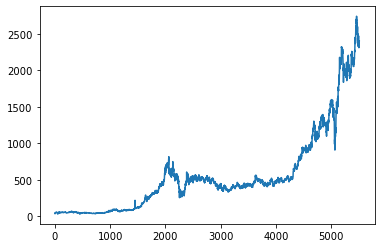

In [53]:
plt.plot(df.index,df['Open'])

In [54]:
x = np.array(X)
x

array([  36.747459,   39.981236,   39.710464, ..., 2375.600098,
       2391.      , 2400.      ])

In [55]:
x = x.reshape(-1,1)

In [56]:
x

array([[  36.747459],
       [  39.981236],
       [  39.710464],
       ...,
       [2375.600098],
       [2391.      ],
       [2400.      ]])

In [57]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_x = sc.fit_transform(x)

In [58]:
scaled_x

array([[0.00182638],
       [0.00301924],
       [0.00291936],
       ...,
       [0.864568  ],
       [0.87024862],
       [0.87356848]])

In [59]:
len(scaled_x)

5506

In [60]:
X_train = []
y_train = []
for i in range(200, 5506):
    X_train.append(scaled_x[i-200:i, 0])
    y_train.append(scaled_x[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [61]:
X_train

array([[0.00182638, 0.00301924, 0.00291936, ..., 0.00801896, 0.00797044,
        0.00756522],
       [0.00301924, 0.00291936, 0.00476571, ..., 0.00797044, 0.00756522,
        0.00773359],
       [0.00291936, 0.00476571, 0.00510816, ..., 0.00756522, 0.00773359,
        0.00773644],
       ...,
       [0.78356326, 0.78817418, 0.79979371, ..., 0.86397776, 0.86250227,
        0.8593853 ],
       [0.78817418, 0.79979371, 0.80237583, ..., 0.86250227, 0.8593853 ,
        0.864568  ],
       [0.79979371, 0.80237583, 0.79794934, ..., 0.8593853 , 0.864568  ,
        0.87024862]])

In [62]:
len(X_train)

5306

In [63]:
y_train

array([0.00773359, 0.00773644, 0.00727699, ..., 0.864568  , 0.87024862,
       0.87356848])

In [64]:
len(y_train)

5306

In [65]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
X_train

array([[[0.00182638],
        [0.00301924],
        [0.00291936],
        ...,
        [0.00801896],
        [0.00797044],
        [0.00756522]],

       [[0.00301924],
        [0.00291936],
        [0.00476571],
        ...,
        [0.00797044],
        [0.00756522],
        [0.00773359]],

       [[0.00291936],
        [0.00476571],
        [0.00510816],
        ...,
        [0.00756522],
        [0.00773359],
        [0.00773644]],

       ...,

       [[0.78356326],
        [0.78817418],
        [0.79979371],
        ...,
        [0.86397776],
        [0.86250227],
        [0.8593853 ]],

       [[0.78817418],
        [0.79979371],
        [0.80237583],
        ...,
        [0.86250227],
        [0.8593853 ],
        [0.864568  ]],

       [[0.79979371],
        [0.80237583],
        [0.79794934],
        ...,
        [0.8593853 ],
        [0.864568  ],
        [0.87024862]]])

In [67]:
y_train

array([0.00773359, 0.00773644, 0.00727699, ..., 0.864568  , 0.87024862,
       0.87356848])

In [68]:
regressor = Sequential()

In [69]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [70]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [71]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [72]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [73]:
regressor.add(Dense(units = 1))

In [74]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [75]:
regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)

166/166 [==============================] - 54s 259ms/step - loss: nan


In [76]:
# NEW COMMENT